# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [49]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [50]:
# Load the data (use delim_whitespace=True)

df= pd.read_csv('../../assets/datasets/salary.dat' , delim_whitespace=True)
# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [51]:
# Apply value_counts() to series for "sx", "dg", and "rk"


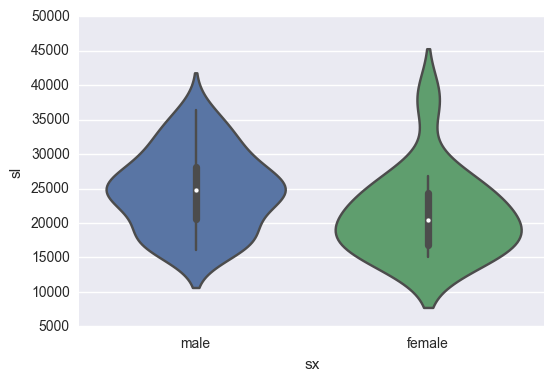

In [52]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

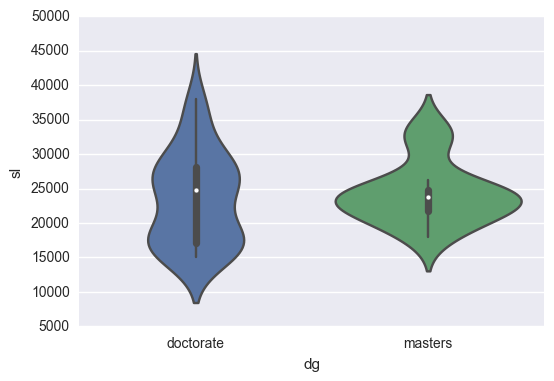

In [53]:
sns.violinplot(x="dg", y="sl", data=df)
plt.show()



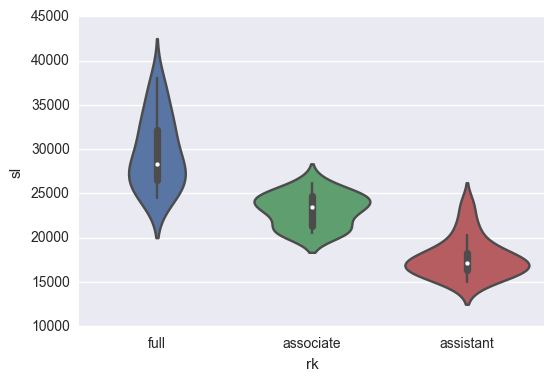

In [54]:
sns.violinplot(x="rk", y="sl", data=df)
plt.show()



In [55]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [56]:
### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

SyntaxError: invalid syntax (<ipython-input-56-f7031c780d81>, line 3)

In [60]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False) # create a sample without replacement--original=0.1 and replace=False

X = subset[[u'yr', u'yd']]     #if your string looks funny just put u' before the string
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve? # compare with all data with sample and with regularization(always better overtime)

Sample: 0.743138338715
All data with sample model: 0.381049357773
Sample with regularization: 0.74202662504
All data with regularization model: 0.379732244531


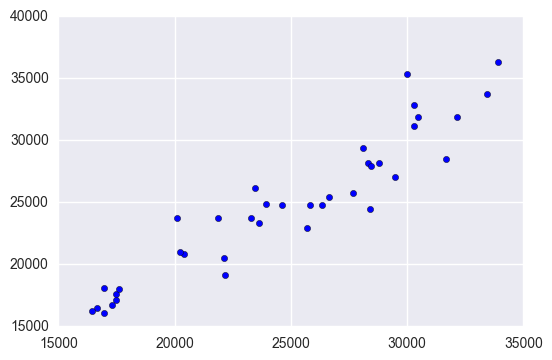

Men: 0.88630543814


In [61]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(predictions,y)
plt.show()
## and print the model score
print "Men:", model.score(X, y)


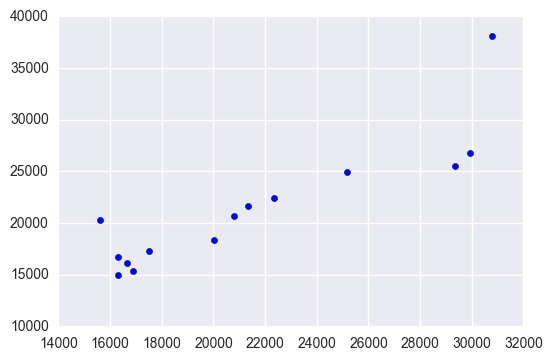

Women: 0.781837240731


In [62]:
# Apply the same model to the women and compare the model score
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(predictions,y)
plt.show()
## and print the model score
print "Women:", model.score(X, y)


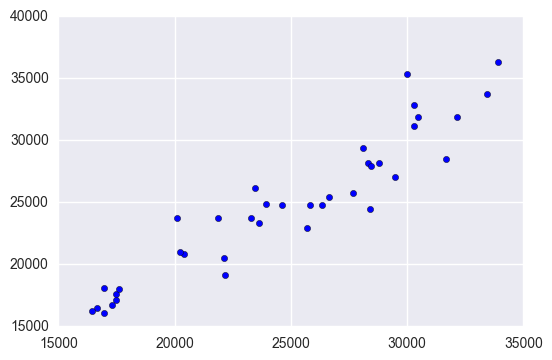

Women other order: 0.88630543814


In [73]:
# What about the other order? 
#Apply to women first
# Fit a model to the women
mask = df["sx"] != "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(predictions,y)
plt.show()
## and print the model score
print "Women other order:", model.score(X, y)





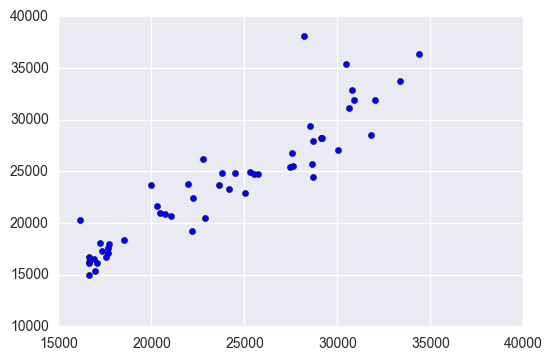

Men other order: 0.849925040345


In [74]:
# What about the other order? 
# Apply to men
# Fit a model to the men
mask = df["sx"] != "men"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(predictions,y)
plt.show()
## and print the model score
print "Men other order:", model.score(X, y)

In [65]:
# This time use regularlization (RidgeCV)

# Apply to women first

# Repeat with regularization
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']


lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "women with regularization:", model.score(X, y)





women with regularization: 0.755592692047


In [71]:
# This time use regularlization (RidgeCV)

# Apply to men

# Repeat with regularization
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', #it is like a filter
       u'dg_masters']]
y = df[mask][u'sl']


lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "men with regularization:", model.score(X, y)

men with regularization: 0.886199410543


### Results

Did regularization improve the second fit?

Men: Men: 0.88630543814
men with regularization: 0.886199410543
Men other order: 0.849925040345
Women: 0.781837240731
women with regularization: 0.755592692047
Women other order: 0.88630543814

Now let's move on to the next category, "dg" (degree).

In [ ]:
mask = (df["dg"] == "doctorate")


In [ ]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=


In [ ]:
# With regularization

mask = (df["dg"] != "doctorate") # !=


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [ ]:
mask = (df["rk"] == "full") # First subset, there are two more #goodness of fit is R**2 VALUES


In [ ]:
# The second permutation of three

In [ ]:
# The third permutation of three

# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [ ]:
# Without regularization
mask = df["sx"] == "female"


In [ ]:
# With regularization, RidgeCV

In [ ]:
# With regularization, LassoCV